In [1]:
!pip install openpyxl

You should consider upgrading via the 'c:\users\keyssiarroyo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
file_name =r'Ordenes de compra PORTAL 1K (datos completo).xlsx'
sheet =  'Datos estudio'

import pandas as pd
data_pro = pd.read_excel(io=file_name, sheet_name=sheet)

data_pro.head(5)

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,...,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,...,NaN,23.364,27.803,4.439,46.728,55.606,2021-11-10,NaN,NaN,NaN
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,...,1.0,1.476.972,1.757.597,280.625,1.476.972,1.757.597,2021-11-10,NaN,NaN,NaN
2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,...,NaN,15.500,15.500,0,155.000,155.000,2021-11-10,NaN,NaN,NaN
3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,...,NaN,22.000,22.000,0,1.100.000,1.100.000,2021-11-10,NaN,NaN,NaN
4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,...,7.0,92.084,109.580,17.496,644.588,767.060,2021-11-10,NaN,NaN,NaN


<AxesSubplot:xlabel='CATEGORÍA'>

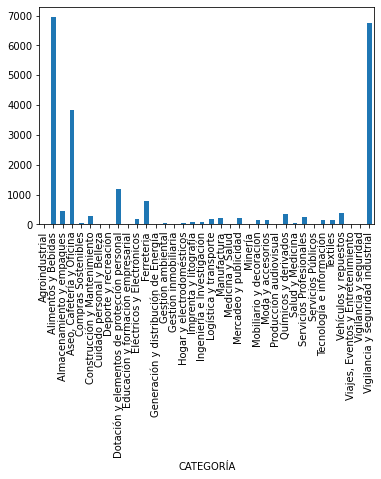

In [5]:
data_pro.groupby(['CATEGORÍA']).size().plot(kind="bar")

<AxesSubplot:xlabel='ESTADO'>

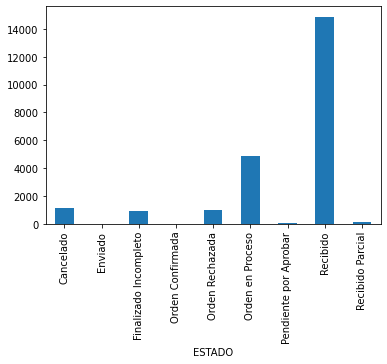

In [6]:
data_pro.groupby(['ESTADO']).size().plot(kind="bar")